In [1]:
import os, sys
sys.path.append(os.getcwd()+"/../..")
sys.path.append(os.getcwd()+"/..")
from noise import *
from qstates import *
from utils import *
from graph import Graph
from game import *
from simulator import *
from math import isclose
from copy import deepcopy
from notebook_utils import DIR_PREFIX
from bit_flip_experiments import is_target_qs, get_initial_states, are_controls_entangled
import time
Precision.PRECISION = 5
Precision.update_threshold()

In [2]:
initial_states = get_initial_states({0:0, 1:1, 2:2})

In [5]:
are_controls_entangled(initial_states[0][0], ClassicalState(), {0:2, 1:1, 2:0})

[[0.250000000000000 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0.250000000000000 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


True

In [10]:
Precision.is_lowerbound = True
noise_model = get_ibm_noise_model(FAKE_MANHATTAN)

In [11]:
def print_channel_stats(channel):
    print(float(channel.probabilities[0][0]),channel.gates[0])
    assert (len(channel.errors[0]) +1 == len(channel.probabilities[0]))

    for (index, err) in enumerate(channel.errors[0]):
        print(float(channel.probabilities[0][index+1]), err)

def print_noise_object(control, target, instruction):
    noise = noise_model.get_noise_object(control, target, instruction)
    print("target instructions: ", noise.target_instructions)
    print("qubits: ", noise.qubits)
    print("controls: ", noise.controls)

    for (index, apply_instructions) in enumerate(noise.apply_instructions):
        print(float(noise.probabilities[index]), apply_instructions) 

In [12]:
m = {0: 10, 1: 14, 2: 13}

In [13]:
channelX0 = noise_model.get_instruction_channel(m[0], Instruction.X)
channelP2 = noise_model.get_meas_channel(Instruction.MEAS, m[2])
channelCX02 = noise_model.get_instruction_channel(m[2], Instruction.CNOT, control=m[0])
channelCX12 = noise_model.get_instruction_channel(m[2], Instruction.CNOT, control=m[1])
channels = [channelCX02, channelCX12, channelP2, channelX0]

In [14]:
print_channel_stats(channelCX02)

0.0 [{'gate': Gate.CNOT, 'address': 13, 'controls': [10], 'params': None}]
0.06666 [{'gate': Gate.CNOT, 'address': 13, 'controls': [10], 'params': None}, {'gate': Gate.X, 'address': 13, 'controls': None, 'params': None}]
0.06666 [{'gate': Gate.CNOT, 'address': 13, 'controls': [10], 'params': None}, {'gate': Gate.X, 'address': 13, 'controls': None, 'params': None}, {'gate': Gate.Z, 'address': 13, 'controls': None, 'params': None}]
0.06666 [{'gate': Gate.CNOT, 'address': 13, 'controls': [10], 'params': None}, {'gate': Gate.Z, 'address': 13, 'controls': None, 'params': None}]
0.06666 [{'gate': Gate.CNOT, 'address': 13, 'controls': [10], 'params': None}, {'gate': Gate.X, 'address': 10, 'controls': None, 'params': None}]
0.06666 [{'gate': Gate.CNOT, 'address': 13, 'controls': [10], 'params': None}, {'gate': Gate.X, 'address': 10, 'controls': None, 'params': None}, {'gate': Gate.X, 'address': 13, 'controls': None, 'params': None}]
0.06666 [{'gate': Gate.CNOT, 'address': 13, 'controls': [10],

In [8]:
print_noise_object(m[0], m[2], Instruction.CNOT)

target instructions:  [Instruction.CNOT]
qubits:  [13]
controls:  [10]
0.06666666666666668 [Instruction.I, Instruction.X]
0.06666666666666668 [Instruction.I, Instruction.Y]
0.06666666666666668 [Instruction.I, Instruction.Z]
0.06666666666666668 [Instruction.X, Instruction.I]
0.06666666666666668 [Instruction.X, Instruction.X]
0.06666666666666668 [Instruction.X, Instruction.Y]
0.06666666666666668 [Instruction.X, Instruction.Z]
0.06666666666666668 [Instruction.Y, Instruction.I]
0.06666666666666668 [Instruction.Y, Instruction.X]
0.06666666666666668 [Instruction.Y, Instruction.Y]
0.06666666666666668 [Instruction.Y, Instruction.Z]
0.06666666666666668 [Instruction.Z, Instruction.I]
0.06666666666666668 [Instruction.Z, Instruction.X]
0.06666666666666668 [Instruction.Z, Instruction.Y]
0.06666666666666668 [Instruction.Z, Instruction.Z]


In [15]:
g = Graph(channels=channels, initial_states=get_initial_states(m))
start = time.time()
g.build_graph(is_target_qs, m, horizon=4, belief_threshold=0.00, max_layer_width=1000000, debug=True,obs_limit=10000, do_safety_check=True, is_pomdp=False)
end = time.time()


0 ~ 0  ~  1
1 ~ 4  ~  6
1 ~ 6  ~  9
1 ~ 8  ~  12
1 ~ 12  ~  17
1 ~ 16  ~  22
2 ~ 20  ~  27
2 ~ 24  ~  32
2 ~ 27  ~  36
2 ~ 29  ~  39
2 ~ 33  ~  44
2 ~ 37  ~  49
2 ~ 39  ~  52
2 ~ 41  ~  55
2 ~ 43  ~  58
2 ~ 47  ~  63
2 ~ 51  ~  68
2 ~ 55  ~  73
2 ~ 57  ~  76
2 ~ 59  ~  79
2 ~ 61  ~  82
2 ~ 65  ~  87
2 ~ 66  ~  89
2 ~ 68  ~  92
2 ~ 70  ~  95
2 ~ 73  ~  99
2 ~ 76  ~  103
3 ~ 79  ~  107
3 ~ 81  ~  110
3 ~ 83  ~  113
3 ~ 87  ~  118
3 ~ 91  ~  123
3 ~ 95  ~  128
3 ~ 97  ~  131
3 ~ 101  ~  136
3 ~ 105  ~  141
3 ~ 109  ~  146
3 ~ 113  ~  151
3 ~ 117  ~  156
3 ~ 119  ~  159
3 ~ 120  ~  161
3 ~ 121  ~  163
3 ~ 124  ~  167
3 ~ 128  ~  172
3 ~ 132  ~  177
3 ~ 133  ~  179
3 ~ 135  ~  182
3 ~ 139  ~  187
3 ~ 143  ~  192
3 ~ 147  ~  197
3 ~ 151  ~  202
3 ~ 155  ~  207
3 ~ 157  ~  210
3 ~ 161  ~  215
3 ~ 165  ~  220
3 ~ 167  ~  223
3 ~ 170  ~  227
3 ~ 174  ~  232
3 ~ 176  ~  235
3 ~ 178  ~  238
3 ~ 180  ~  241
3 ~ 184  ~  246
3 ~ 188  ~  251
3 ~ 192  ~  256
3 ~ 194  ~  259
3 ~ 196  ~  262
3 ~ 198  ~ 

In [17]:
get_bellman_graph(g, is_target_qs, outpath="./temp_cairo4.py", address_space=m, horizon=4)

0.52539

In [9]:
index = 0
horizon = 4
backend = FAKE_MANHATTAN
algorithms = load_algorithms_file(DIR_PREFIX + f'algorithms/{backend}_{index}_{horizon}')

In [29]:
dump_algorithms(algorithms, "temp_cairo4_ibm.py", for_ibm=True)

In [6]:
get_real_accuracy(algorithms[0], FAKE_MANHATTAN, get_initial_states(m), is_target_qs, m, 4, path_prefix="../")

0.7507729290929107

In [39]:
get_real_accuracy(algorithms[1], FAKE_CAIRO, get_initial_states(m), is_target_qs, m, 7, path_prefix="../")

0.9665542332036531

# Simulator Test

In [13]:
from bit_flip_experiments import execute_my_algo, ibm_execute_my_algo
from perth_algos import simulate_algo

In [12]:
execute_my_algo(5000, simulate_algo, perth_model, default_mapping(), is_target_qs, hardware_spec_m=m)

(0.971, 3.4882)

In [2]:

import os, sys
sys.path.append(os.getcwd()+"/../..")
sys.path.append(os.getcwd()+"/..")
from bit_flip_experiments import execute_my_algo, ibm_execute_my_algo, ibm_prepare_bell_state, ibm_is_target_qs
from perth_algos import simulate_algo
from ibm_perth_algos import algorithms
from noise import *
from qstates import *
from utils import *
from graph import Graph
from game import *
from simulator import *
from math import isclose
from copy import deepcopy
Precision.PRECISION = 5
Precision.update_threshold()
perth_model = get_ibm_noise_model(FAKE_PERTH)
m = {0: 0, 1: 2, 2: 1}
basis_gates = perth_model.get_basis_gates()

basis gates ['cx', 'delay', 'id', 'measure', 'reset', 'rz', 'sx', 'x']


In [3]:
ibm_execute_my_algo(5000, algorithms[0], basis_gates, FAKE_PERTH, m, is_simulated=True, log="log.txt")

0.974

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

In [27]:
qc = QuantumCircuit(qr, cr)
ibm_prepare_bell_state(qc, 3)
qc.draw()

┌───┐     ┌───┐┌───┐
q82_0: ┤ H ├──■──┤ X ├┤ Z ├
       └───┘┌─┴─┐└───┘└───┘
q82_1: ─────┤ X ├──────────
            └───┘          
q82_2: ────────────────────
                           
 c5: 3/════════════════════

In [28]:
algorithms[0](qc, basis_gates, cr)
qc.save_statevector('res', pershot=True)

In [29]:
qc.draw()

┌───┐     ┌───┐┌───┐        ┌──────────┐ res 
q82_0: ┤ H ├──■──┤ X ├┤ Z ├──■─────┤0         ├──░──
       └───┘┌─┴─┐└───┘└───┘  │     │          │  ░  
q82_1: ─────┤ X ├──■─────────┼─────┤          ├──░──
            └───┘┌─┴─┐     ┌─┴─┐┌─┐│          │  ░  
q82_2: ──────────┤ X ├─────┤ X ├┤M├┤          ├──░──
                 └───┘     └───┘└╥┘│  If_else │  ░  
 c5_0: ══════════════════════════╬═╡          ╞═════
                                 ║ │          │     
 c5_1: ══════════════════════════╬═╡          ╞═════
                                 ║ │          │     
 c5_2: ══════════════════════════╩═╡0         ╞═════
                                   └──────────┘

In [30]:
initial_layout = [m[0], m[1], m[2]]
r = ibm_simulate_circuit(qc, perth_model.ibm_noise_model, 1000, initial_layout)

In [31]:
acc = 0
for r0 in r:
    if ibm_is_target_qs(r0, initial_layout):
        acc+=1
acc/1024

0.9794921875

In [3]:
from qiskit.visualization import plot_bloch_vector
import numpy as np

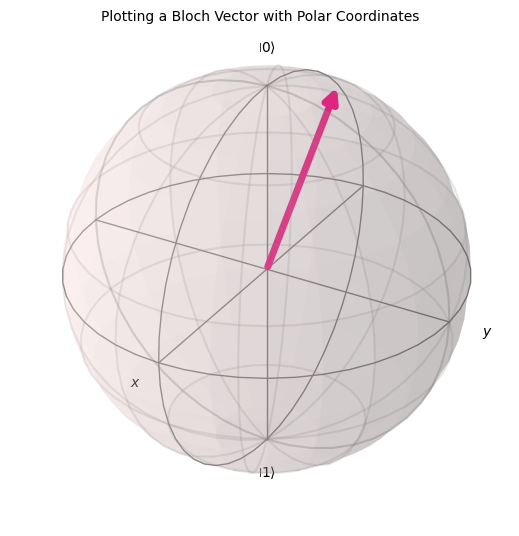

In [21]:
plot_bloch_vector([1, np.pi/4, np.pi],
coord_type='spherical',
title='Plotting a Bloch Vector with Polar Coordinates')

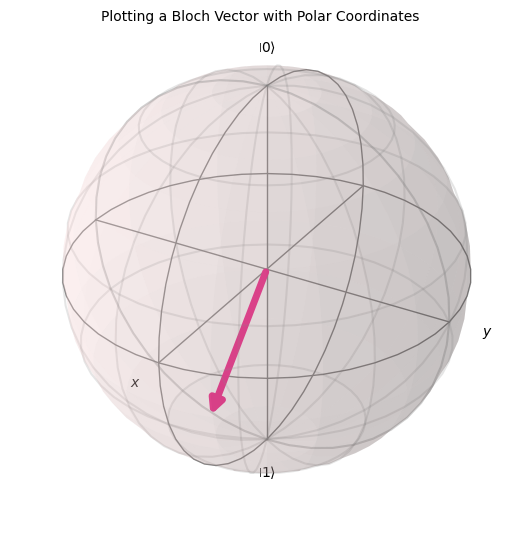

In [6]:
plot_bloch_vector([np.pi, 3*np.pi/4, 2*np.pi],
coord_type='spherical',
title='Plotting a Bloch Vector with Polar Coordinates')

In [7]:
import qutip

ModuleNotFoundError: No module named 'qutip'